In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr
from scipy import stats
import statistics
import math

In [105]:
df=pd.read_csv("Bike Sharing dataset/day.csv", index_col='instant')

In [106]:
df.isna().sum()

dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [107]:
df

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341


In [108]:
df['season']= df['season'].replace([1,2,3,4],['Spring','Summer','fall','winter'])
df['weathersit']= df['weathersit'].replace([1,2,3,4],['Clear','Mist','Light Snow','Heavy Rain'])
df['weekday']= df['weekday'].replace([0,1,2,3,4,5,6],['Sun','Mon','Tue','wed','Thu','Fri','Sat'])
df['yr']= df['yr'].replace([0,1],[2011,2012])
df['mnth']= df['mnth'].replace([1,2,3,4,5,6,7,8,9,10,11,12],['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
df['holiday']= df['holiday'].replace([0,1],['No','Yes'])
df['workingday']= df['workingday'].replace([0,1],['No','Yes'])

In [109]:
df

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,2011-01-01,Spring,2011,Jan,No,Sat,No,Mist,0.344167,0.363625,0.805833,0.160446,331,654,985
2,2011-01-02,Spring,2011,Jan,No,Sun,No,Mist,0.363478,0.353739,0.696087,0.248539,131,670,801
3,2011-01-03,Spring,2011,Jan,No,Mon,Yes,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
4,2011-01-04,Spring,2011,Jan,No,Tue,Yes,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
5,2011-01-05,Spring,2011,Jan,No,wed,Yes,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
727,2012-12-27,Spring,2012,Dec,No,Thu,Yes,Mist,0.254167,0.226642,0.652917,0.350133,247,1867,2114
728,2012-12-28,Spring,2012,Dec,No,Fri,Yes,Mist,0.253333,0.255046,0.590000,0.155471,644,2451,3095
729,2012-12-29,Spring,2012,Dec,No,Sat,No,Mist,0.253333,0.242400,0.752917,0.124383,159,1182,1341


# Some basic EDA

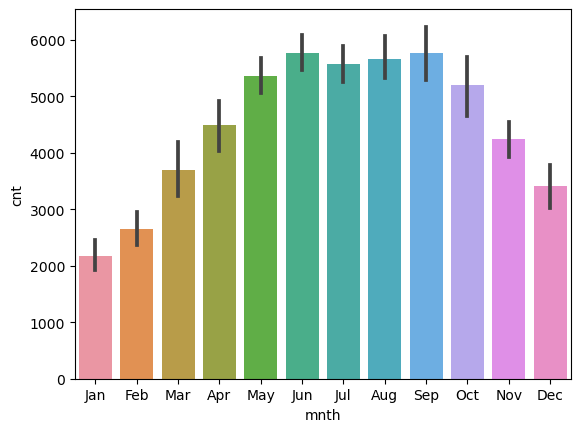

In [110]:
sns.barplot(x='mnth',y='cnt',data=df)
plt.show()

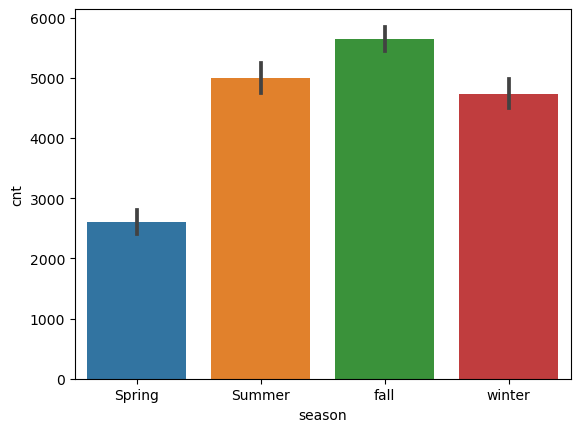

In [111]:
sns.barplot(x='season',y='cnt',data=df)
plt.show()

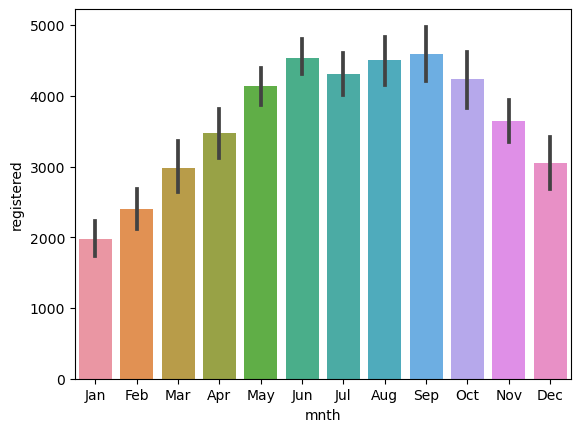

In [112]:
sns.barplot(x='mnth',y='registered',data=df)
plt.show()

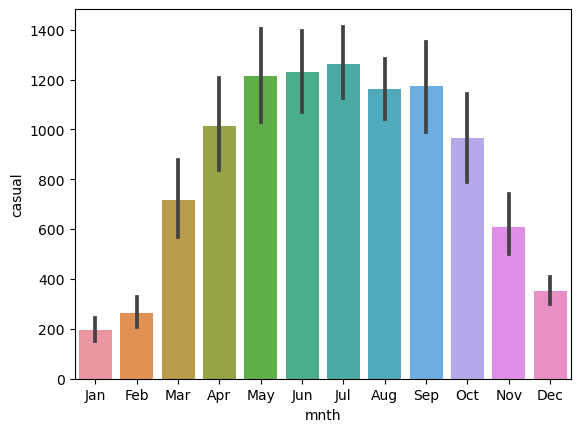

In [113]:
sns.barplot(x='mnth',y='casual',data=df)
plt.show()

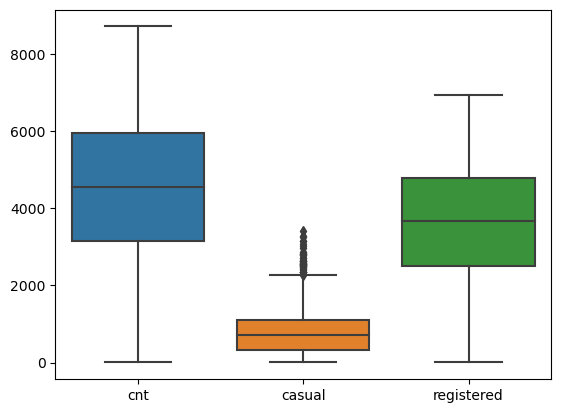

In [114]:
sns.boxplot(data=df[['cnt','casual','registered']])
plt.show()

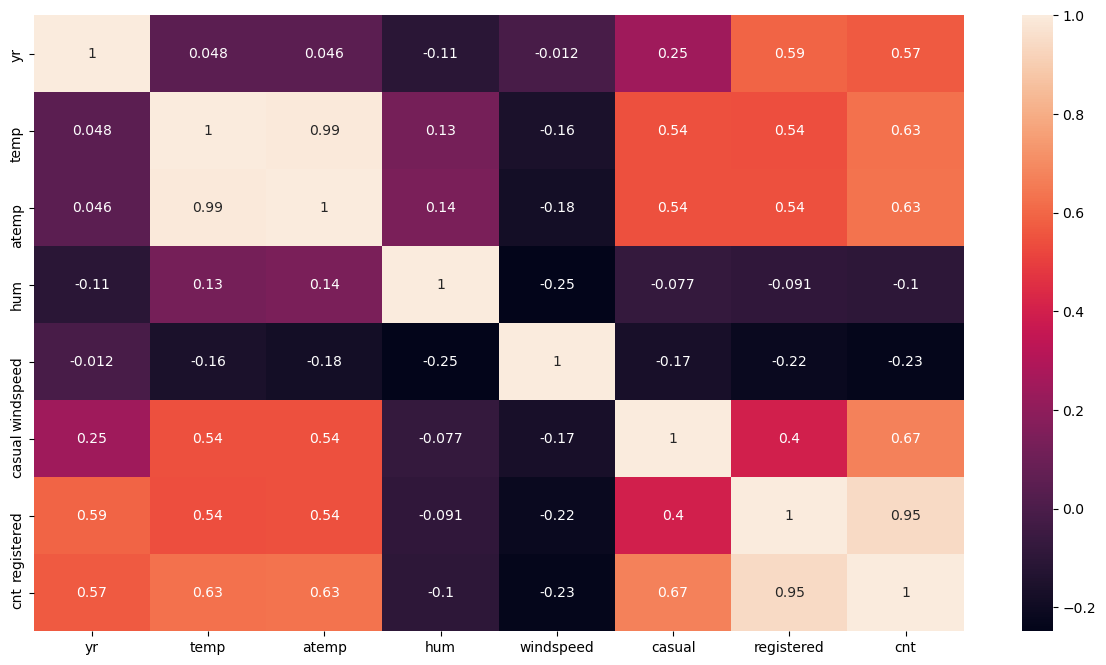

In [115]:
plt.figure(figsize=(15,8))
#sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(df.corr(), annot=True)
plt.show()

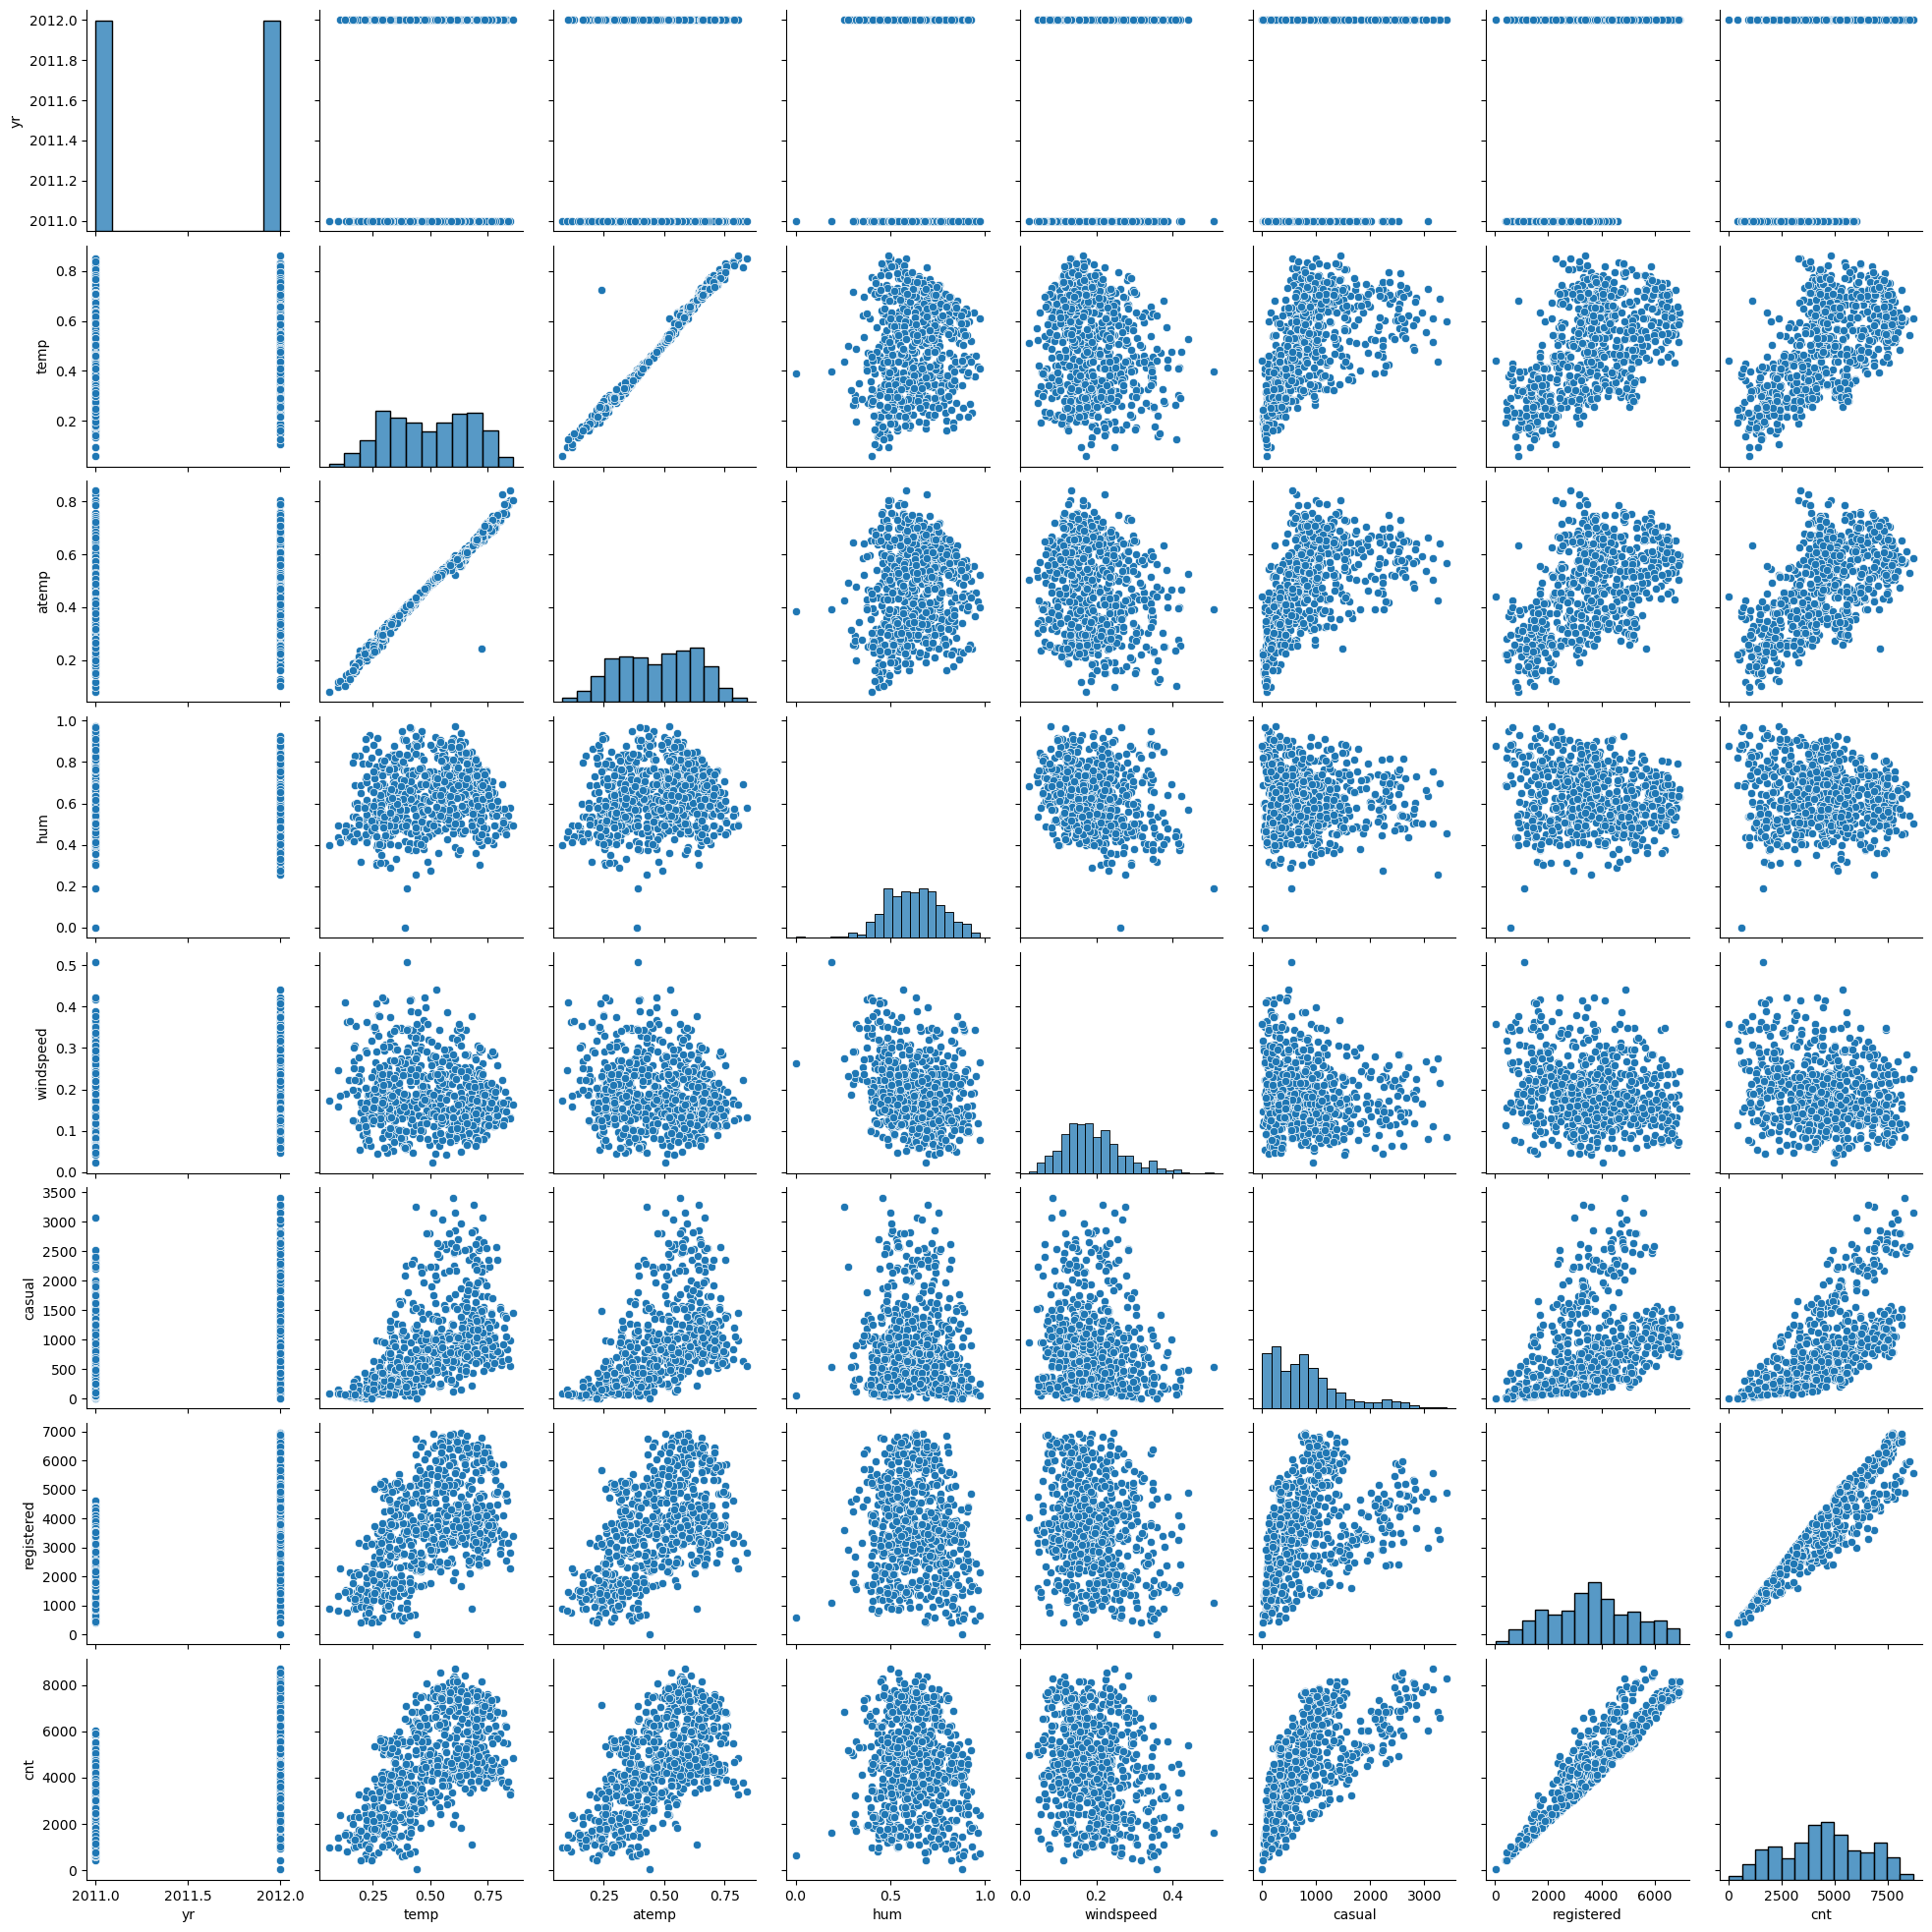

In [116]:
sns.pairplot(df)
plt.show()

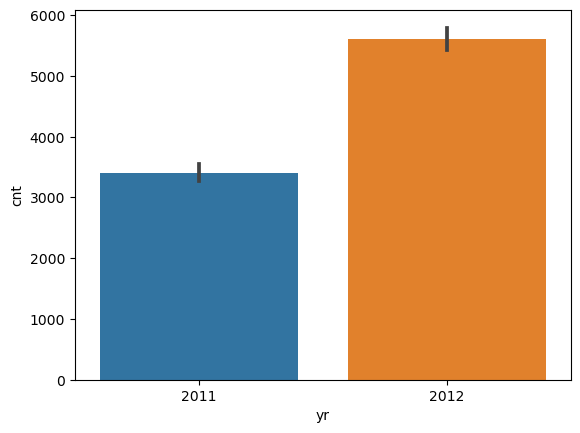

In [117]:
ax = sns.barplot(x="yr", y="cnt", data=df)
plt.show()

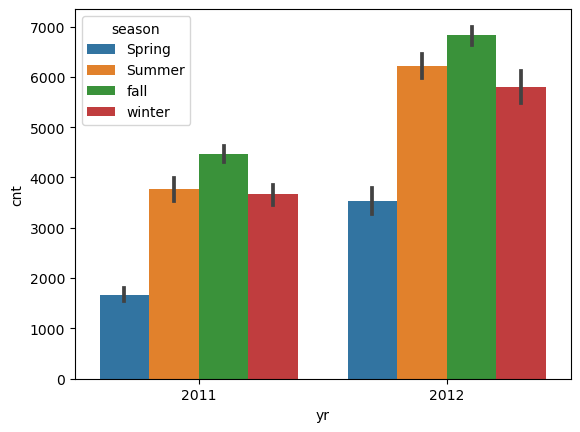

In [118]:
ax = sns.barplot(x="yr", y="cnt",hue='season', data=df)
plt.show()

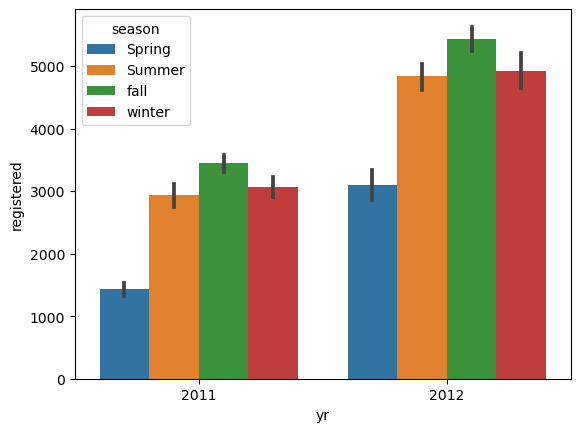

In [119]:
ax = sns.barplot(x="yr", y="registered",hue='season', data=df)
plt.show()

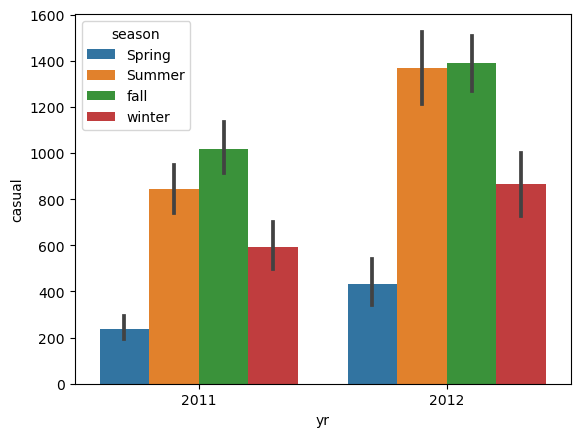

In [120]:
ax = sns.barplot(x="yr", y="casual",hue='season', data=df)
plt.show()

# Regression

<b>Regression between the total count of bike hiring vs temperature</b> <br>
Here the dependent variable is Count and the independent variable is the Temperature

In [121]:
x = df['temp']
y = df['cnt']

#Here we have normalised the cnt variable using min-max normalization because the temp variable is normalised
y = (y-min(y))/(max(y)-min(y))
y

instant
1      0.110792
2      0.089623
3      0.152669
4      0.177174
5      0.181546
         ...   
727    0.240681
728    0.353543
729    0.151749
730    0.204096
731    0.311436
Name: cnt, Length: 731, dtype: float64

In [122]:
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

print(f'The slope is {slope:.3f}')
print(f'The intercept is {intercept:.3f}')
print(f'The p value is {p_value}')
print(f'The r value is {r_value}')
print(f'The Std Err is {std_err}')

The slope is 0.764
The intercept is 0.137
The p value is 2.8106223975900516e-81
The r value is 0.6274940090334918
The Std Err is 0.035111370333890835


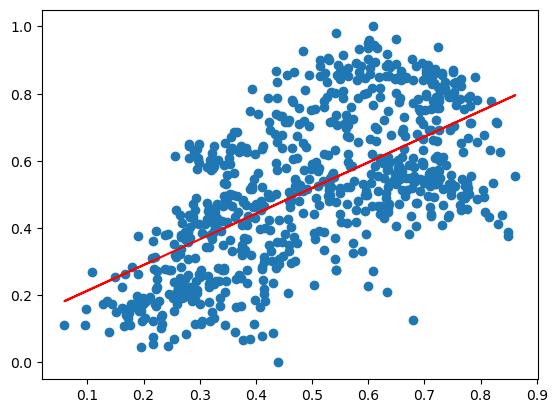

In [123]:
def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.scatter(x, y)
plt.plot(x, mymodel, color='red')
plt.show()

The reg eqn is <br>
<b>Y = 0.764 X + 0.137 </b><br>
So as the Temp is increading the count is also increasing

<b>Regression of humidity against total count</b><br>
Here the independent variable is humidity

In [124]:
x = df['hum']
y

instant
1      0.110792
2      0.089623
3      0.152669
4      0.177174
5      0.181546
         ...   
727    0.240681
728    0.353543
729    0.151749
730    0.204096
731    0.311436
Name: cnt, Length: 731, dtype: float64

In [125]:
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

print(f'The slope is {slope:.3f}')
print(f'The intercept is {intercept:.3f}')
print(f'The p value is {p_value}')
print(f'The r value is {r_value}')
print(f'The Std Err is {std_err}')

The slope is -0.158
The intercept is 0.615
The p value is 0.006454143325437063
The r value is -0.10065856213715528
The Std Err is 0.05766116875479329


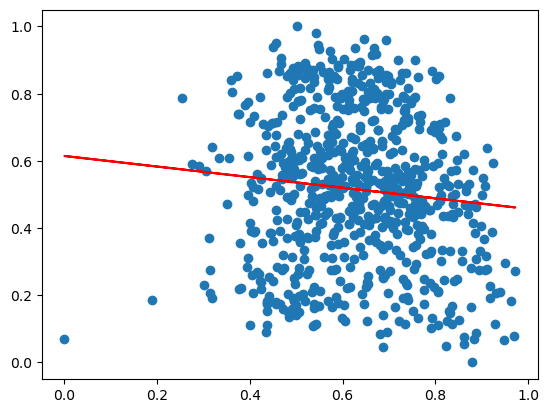

In [126]:
def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.scatter(x, y)
plt.plot(x, mymodel, color='red')
plt.show()

The reg eqn is <br>
<b>Y = - 0.158 X + 0.615 </b><br>
So as the Humidity is increading the count is decreasing

<b>Regression of Wind Speed against total count</b><br>
Here the independent variable is Wind Speed

In [127]:
x = df['windspeed']
y

instant
1      0.110792
2      0.089623
3      0.152669
4      0.177174
5      0.181546
         ...   
727    0.240681
728    0.353543
729    0.151749
730    0.204096
731    0.311436
Name: cnt, Length: 731, dtype: float64

In [128]:
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)


print(f'The slope is {slope:.3f}')
print(f'The intercept is {intercept:.3f}')
print(f'The p value is {p_value}')
print(f'The r value is {r_value}')
print(f'The Std Err is {std_err}')

The slope is -0.675
The intercept is 0.644
The p value is 1.3599586778864865e-10
The r value is -0.23454499742167004
The Std Err is 0.10354212424788962


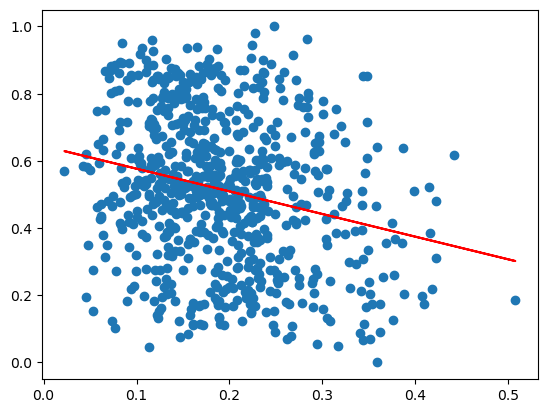

In [129]:
def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.scatter(x, y)
plt.plot(x, mymodel, color='red')
plt.show()

The reg eqn is<br>
<b>Y = - 0.675 X + 0.644</b><br>
So as the Windspeed is increading the count is decreasing

# Hypothesis Testing between casual and registered users

H0 = Mean of Registered Users <= Mean of Casual Users <br>
H1 = Mean of Registered Users > Mean of Casual Users

In [130]:
registered_mean = df['registered'].mean()

In [131]:
registered_mean

3656.172366621067

In [132]:
casual_mean = df['casual'].mean()

In [133]:
casual_mean

848.1764705882352

In [134]:
std_dev_reg = np.std(df['registered'])
std_dev_reg

1559.188804963553

In [135]:
std_dev_casual = np.std(df['casual'])
std_dev_casual

686.1526815322253

In [136]:
from scipy.stats import ttest_ind
cat1 = df['registered']
cat2 = df['casual']
ttest_ind(cat1, cat2)

Ttest_indResult(statistic=44.53675092663381, pvalue=2.539407750032885e-274)

The table value is 1.645 (at 95% confidence level) <br>
The calculated value is 44.53 <br>
Since calc value > table value <br>
We can reject the null hypothesis <br>
Which implies that <b>Mean of Registered Users > Mean of Casual Users</b>

# Correlation

<b> Correlation between Temperature and Humidity</b>

In [137]:
x = df['temp']
y = df['hum']

r = pd.DataFrame(np.corrcoef(x,y))
r

,0,1
0,1.000000,0.126963
1,0.126963,1.000000


We find that there is a Positive weak correlation between Temperature and Humidity

<b> Correlation between Temperature and Windspeed</b>

In [138]:
x = df['temp']
y = df['windspeed']

r = pd.DataFrame(np.corrcoef(x,y))
r

,0,1
0,1.000000,-0.157944
1,-0.157944,1.000000


We find that there is a Negative weak correlation between Temperature and Windspeed

In [139]:
df

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,2011-01-01,Spring,2011,Jan,No,Sat,No,Mist,0.344167,0.363625,0.805833,0.160446,331,654,985
2,2011-01-02,Spring,2011,Jan,No,Sun,No,Mist,0.363478,0.353739,0.696087,0.248539,131,670,801
3,2011-01-03,Spring,2011,Jan,No,Mon,Yes,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
4,2011-01-04,Spring,2011,Jan,No,Tue,Yes,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
5,2011-01-05,Spring,2011,Jan,No,wed,Yes,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
727,2012-12-27,Spring,2012,Dec,No,Thu,Yes,Mist,0.254167,0.226642,0.652917,0.350133,247,1867,2114
728,2012-12-28,Spring,2012,Dec,No,Fri,Yes,Mist,0.253333,0.255046,0.590000,0.155471,644,2451,3095
729,2012-12-29,Spring,2012,Dec,No,Sat,No,Mist,0.253333,0.242400,0.752917,0.124383,159,1182,1341


In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 731 entries, 1 to 731
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      731 non-null    object 
 1   season      731 non-null    object 
 2   yr          731 non-null    int64  
 3   mnth        731 non-null    object 
 4   holiday     731 non-null    object 
 5   weekday     731 non-null    object 
 6   workingday  731 non-null    object 
 7   weathersit  731 non-null    object 
 8   temp        731 non-null    float64
 9   atemp       731 non-null    float64
 10  hum         731 non-null    float64
 11  windspeed   731 non-null    float64
 12  casual      731 non-null    int64  
 13  registered  731 non-null    int64  
 14  cnt         731 non-null    int64  
dtypes: float64(4), int64(4), object(7)
memory usage: 107.5+ KB


In [140]:
dummies = pd.get_dummies(df[['workingday', 'holiday', 'weathersit', 'mnth', 'season','weekday']])

In [141]:
merged = pd.concat([df, dummies], axis='columns')

In [142]:
merged = merged.drop(['workingday', 'holiday', 'weathersit', 'mnth', 'season', 'dteday','weekday', 'cnt', 'casual', 'registered'], axis=1)
merged

,yr,temp,atemp,hum,windspeed,workingday_No,workingday_Yes,holiday_No,holiday_Yes,weathersit_Clear,...,season_Summer,season_fall,season_winter,weekday_Fri,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_wed
instant,,,,,,,,,,,,,,,,,,,,,
1,2011,0.344167,0.363625,0.805833,0.160446,1,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2,2011,0.363478,0.353739,0.696087,0.248539,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,2011,0.196364,0.189405,0.437273,0.248309,0,1,1,0,1,...,0,0,0,0,1,0,0,0,0,0
4,2011,0.200000,0.212122,0.590435,0.160296,0,1,1,0,1,...,0,0,0,0,0,0,0,0,1,0
5,2011,0.226957,0.229270,0.436957,0.186900,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
727,2012,0.254167,0.226642,0.652917,0.350133,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
728,2012,0.253333,0.255046,0.590000,0.155471,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
729,2012,0.253333,0.242400,0.752917,0.124383,1,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [147]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 731 entries, 1 to 731
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   yr                     731 non-null    int64  
 1   temp                   731 non-null    float64
 2   atemp                  731 non-null    float64
 3   hum                    731 non-null    float64
 4   windspeed              731 non-null    float64
 5   workingday_No          731 non-null    uint8  
 6   workingday_Yes         731 non-null    uint8  
 7   holiday_No             731 non-null    uint8  
 8   holiday_Yes            731 non-null    uint8  
 9   weathersit_Clear       731 non-null    uint8  
 10  weathersit_Light Snow  731 non-null    uint8  
 11  weathersit_Mist        731 non-null    uint8  
 12  mnth_Apr               731 non-null    uint8  
 13  mnth_Aug               731 non-null    uint8  
 14  mnth_Dec               731 non-null    uint8  
 15  mnth_F

In [148]:
X = merged
y = df['cnt']

In [149]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [150]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [151]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
yr,1938.700434
temp,3508.626855
atemp,1412.016213
hum,-1938.237782
windspeed,-3117.593440
workingday_No,-66.817633
workingday_Yes,66.817633
holiday_No,122.584689
holiday_Yes,-122.584689
weathersit_Clear,718.862651


In [152]:
y_pred = regressor.predict(X_test)

In [153]:
df_pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_pred

,Actual,Predicted
instant,,
197,5923,4395.691280
188,4592,4679.933899
15,1248,1506.757659
32,1360,983.545988
391,4075,3685.278223
...,...,...
567,5870,5356.750843
689,5499,4808.873263
267,5423,5256.941252


In [154]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 595.4137730097056
Mean Squared Error: 617181.6816513557
Root Mean Squared Error: 785.6091150510894


In [156]:
regressor.score(X_test, y_test)

0.854888089345875